In [156]:
# importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from plotly import figure_factory as ff
import graphviz

In [19]:
from google.colab import files
u = files.upload()

Saving Iris.csv to Iris (1).csv


In [20]:
iris = pd.read_csv("Iris.csv")

# **About The Data**

In [21]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# **Exploratory Data Analysis**

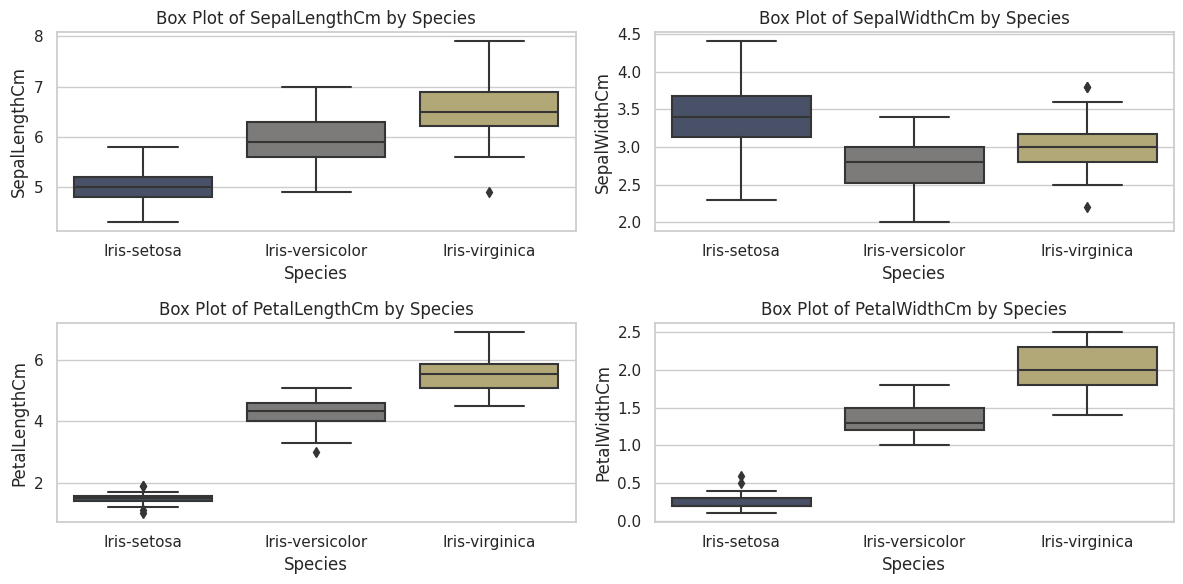

In [24]:
#boxplot
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.columns[1:-1]):  # Exclude 'Id' and 'Species'
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=iris, x="Species", y=feature, palette="cividis")
    plt.title(f'Box Plot of {feature} by Species')
plt.tight_layout()
plt.show()


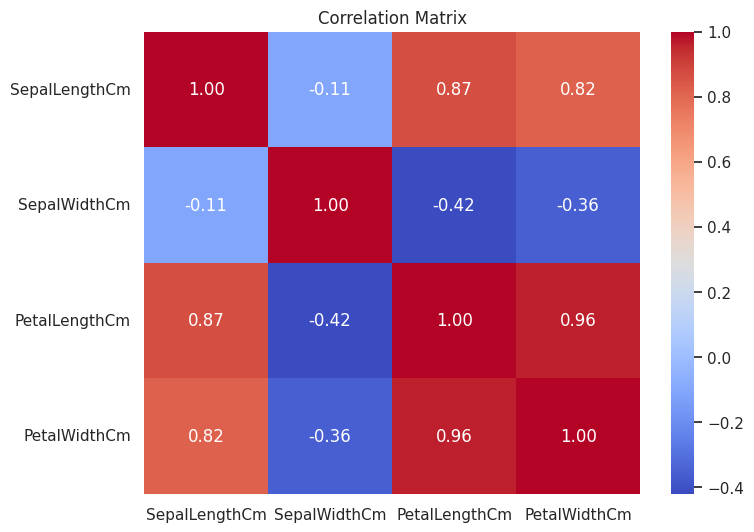

In [25]:
# correlation
corr = iris.iloc[:, 1:-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Splitting The Data Into Features and Target**

In [103]:
X = iris.drop(["Id", "Species"], axis =1)
y = iris["Species"]

In [104]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# **Performing GridSearchCV to find the Best Parameters**

In [107]:
dtc = DecisionTreeClassifier(random_state=50)

In [108]:
#defining parameters that we will be using for hyperparameter tuning
param = {
         "max_depth": [i for i in range(3,7)] + [None],
         "min_samples_split":[j for j in range(2,6)]
        }

In [109]:
grid_cv = GridSearchCV(dtc, param, cv=5)

In [110]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'min_samples_split': [2, 3, 4, 5]})

In [111]:
grid_cv.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [112]:
best_dtc = grid_cv.best_estimator_

In [113]:
accuracy = best_dtc.score(x_test, y_test)
accuracy

0.9333333333333333

In [114]:
y_pred = best_dtc.predict(x_test)

In [115]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]])

In [116]:
class_rep = classification_report(y_test, y_pred, output_dict=True)
class_rep

{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 10},
 'Iris-versicolor': {'precision': 1.0,
  'recall': 0.8461538461538461,
  'f1-score': 0.9166666666666666,
  'support': 13},
 'Iris-virginica': {'precision': 0.7777777777777778,
  'recall': 1.0,
  'f1-score': 0.8750000000000001,
  'support': 7},
 'accuracy': 0.9333333333333333,
 'macro avg': {'precision': 0.9259259259259259,
  'recall': 0.9487179487179488,
  'f1-score': 0.9305555555555555,
  'support': 30},
 'weighted avg': {'precision': 0.9481481481481481,
  'recall': 0.9333333333333333,
  'f1-score': 0.9347222222222221,
  'support': 30}}

In [117]:
# In the table below
# first row shows precision
# second reow shows recall
# third row shows f1
# fourth row shows support

df = round(pd.DataFrame(class_rep),2)
table = ff.create_table(df, "mint_r")
table

# **Visualising The Decision Tree**

In [162]:
from sklearn.metrics import accuracy_score
dt1 = DecisionTreeClassifier(random_state=20)
model = dt1.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

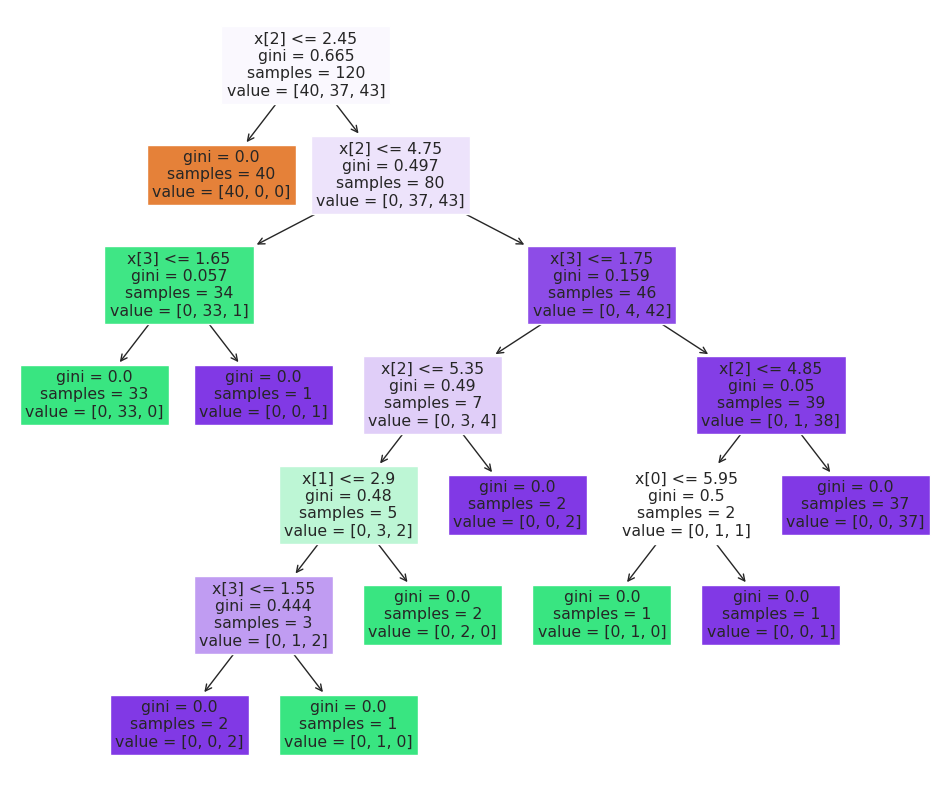

In [163]:
plt.figure(figsize=(12, 10))
plot_tree(dt1, filled=True)
plt.show()

# **Making A Random Forest Model To Check if it Performs Better**

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier(random_state=50)

In [120]:
params = {"max_depth": [i for i in range(2,6)] + [None],
          "min_samples_split": [i for i in range(3,7)]}

In [121]:
grid_rf = GridSearchCV(rfc, params, cv=5)

In [122]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [3, 4, 5, 6]})

In [123]:
grid_rf.best_params_

{'max_depth': 2, 'min_samples_split': 3}

In [124]:
best_rf = grid_rf.best_estimator_

In [126]:
accuracy_rf = best_rf.score(x_test, y_test)
accuracy_rf

1.0

In [134]:
rf_pred = best_rf.predict(x_test)

In [135]:
rf_con_mat = confusion_matrix(y_test, rf_pred)
rf_con_mat

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

In [139]:
# In the table below
# first row shows precision
# second reow shows recall
# third row shows f1
# fourth row shows support

rf_class_rep = classification_report(y_test, rf_pred, output_dict=True)
rf_df = round(pd.DataFrame(rf_class_rep),2)
ff.create_table(rf_df, "oryel_r")

In [159]:
graph = export_graphviz(dt1, out_file=None, filled=True ,rounded=True, special_characters=True)

In [161]:
plot= graphviz.Source(graph)
plot.view()

'Source.gv.pdf'